In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
car  = pd.read_csv("train.csv")

In [3]:
car.head()

v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5

In [4]:
car.tail()

v.id  on road old  on road now  years      km  rating  condition  \
995   996       633238       743850      5  125092       1          6   
996   997       599626       848195      4   83370       2          9   
997   998       646344       842733      7   86722       1          8   
998   999       535559       732439      2  140478       4          5   
999  1000       590105       779743      5   67295       4          2   

     economy  top speed   hp  torque  current price  
995       11        171   95      97       190744.0  
996       14        161  101     120       419748.0  
997        9        196  113      89       405871.0  
998        9        184  112     128        74398.0  
999        8        199   99      96       414938.5

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [6]:
# drop unwanted colums
car.drop("v.id",axis=1,inplace=True)

In [7]:
# Check missing values
car.isnull().sum()

on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

In [8]:
# check duplicet values
car.duplicated().sum()

0

In [9]:
car.describe()

on road old  on road now        years             km       rating  \
count    1000.000000    1000.0000  1000.000000    1000.000000  1000.000000   
mean   601648.286000  799131.3970     4.561000  100274.430000     2.988000   
std     58407.246204   57028.9502     1.719079   29150.463233     1.402791   
min    500265.000000  700018.0000     2.000000   50324.000000     1.000000   
25%    548860.500000  750997.7500     3.000000   74367.500000     2.000000   
50%    601568.000000  798168.0000     5.000000  100139.500000     3.000000   
75%    652267.250000  847563.2500     6.000000  125048.000000     4.000000   
max    699859.000000  899797.0000     7.000000  149902.000000     5.000000   

         condition      economy   top speed          hp       torque  \
count  1000.000000  1000.000000  1000.00000  1000.00000  1000.000000   
mean      5.592000    11.625000   166.89300    84.54600   103.423000   
std       2.824449     2.230549    19.28838    20.51694    21.058716   
min       1.000000     8.000000   135.00000    50.00000    68.000000   
25%       3.000000    10.000000   150.00000    67.00000    85.000000   
50%       6.000000    12.000000   166.00000    84.00000   104.000000   
75%       8.000000    13.000000   184.00000   102.00000   121.000000   
max      10.000000    15.000000   200.00000   120.00000   140.000000   

       current price  
count     1000.00000  
mean    308520.24250  
std     126073.25915  
min      28226.50000  
25%     206871.75000  
50%     306717.75000  
75%     414260.87500  
max     584267.50000

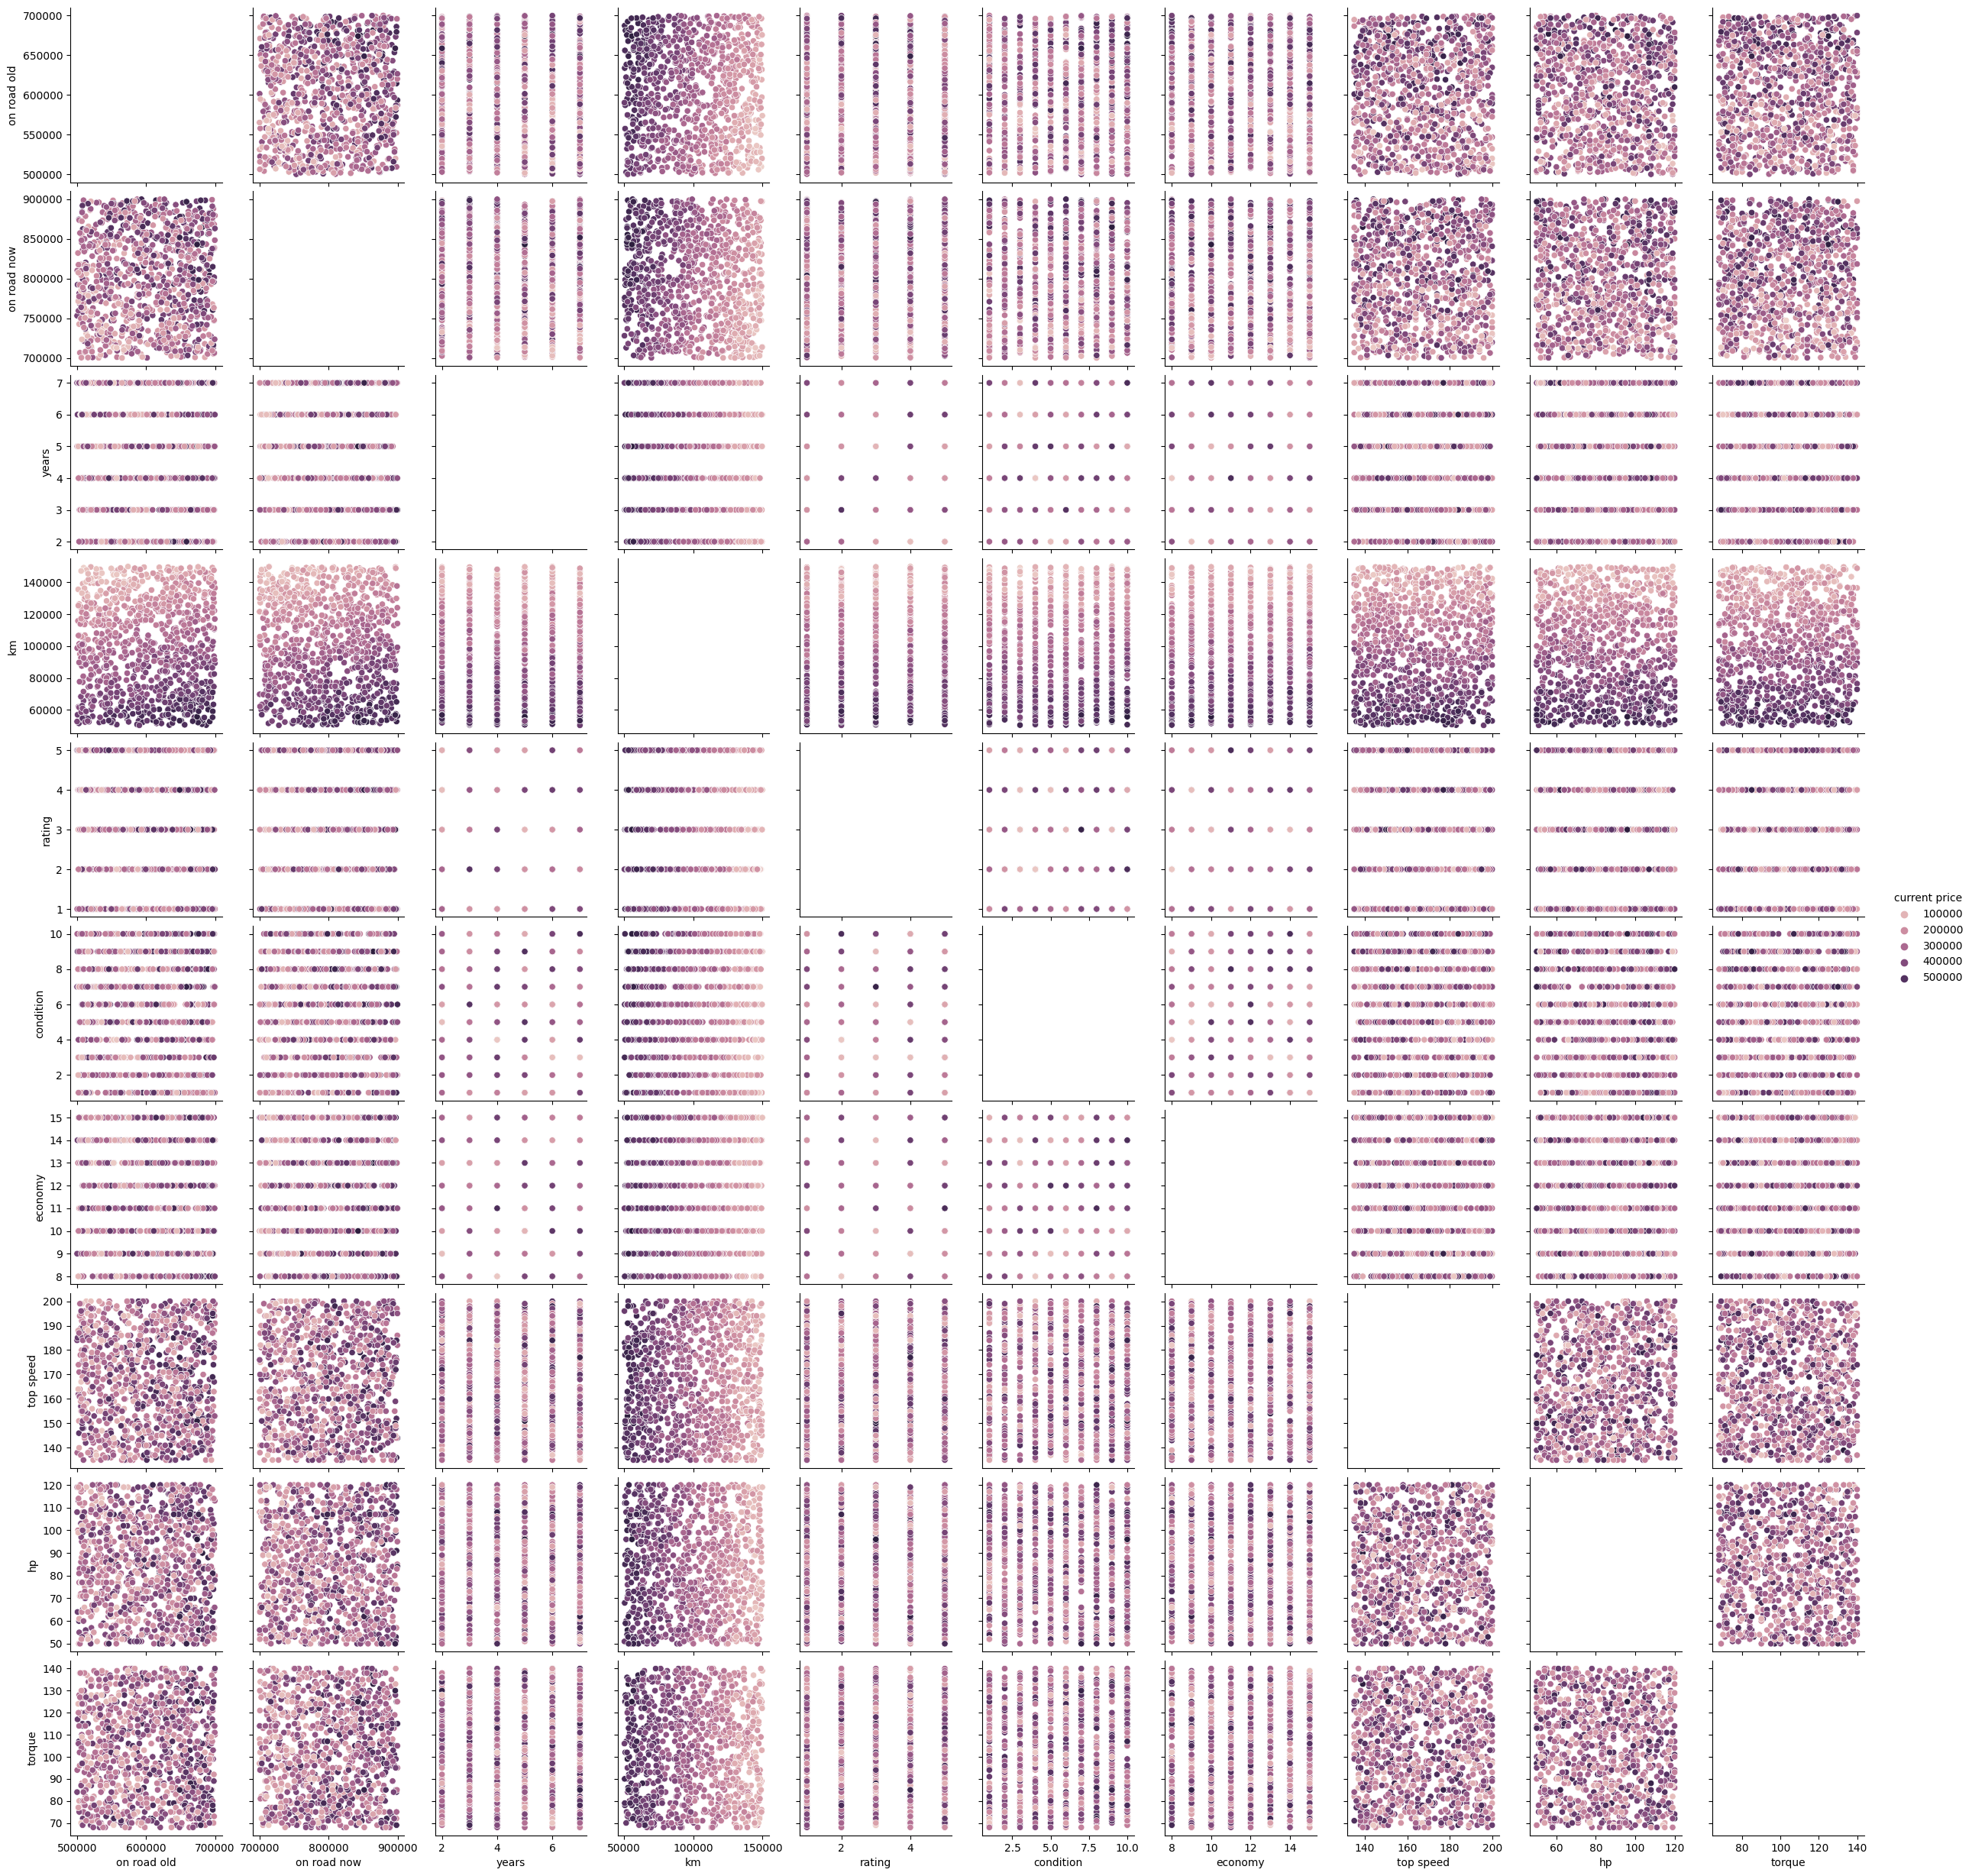

In [10]:
sns.pairplot(hue="current price",data=car)

<AxesSubplot:>

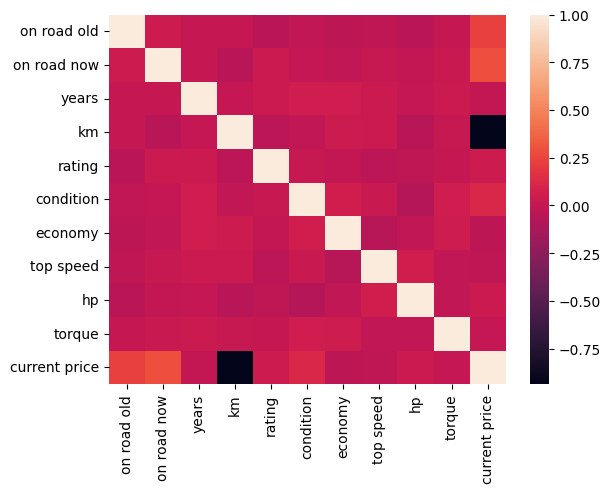

In [11]:
sns.heatmap(car.corr())

In [12]:
# divide dependance featuee and indipendance features
x = car.iloc[:,:-1]
y = car.iloc[:,-1]

In [13]:
# divide trian test split
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [15]:
X_train.shape

(670, 10)

In [16]:
y_train.shape

(670,)

In [17]:
X_test.shape

(330, 10)

In [18]:
y_test.shape

(330,)

In [19]:
# feature scallind standardscaller
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

## LinearRegression

In [22]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [23]:
linear.fit(X_train,y_train)

LinearRegression()

In [24]:
linear.coef_

array([ 2.87534405e+04,  2.87661675e+04, -2.90081249e+03, -1.16342796e+05,
        4.28145570e+02,  1.32765241e+04,  9.72262403e+01, -4.97774035e+02,
        6.13713106e+02, -8.16780697e+01])

In [25]:
linear.intercept_

309409.25373134325

In [26]:
y_predict = linear.predict(X_test)

In [27]:
# msq & mae
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [28]:
mse = mean_squared_error(y_test,y_predict)
print(mse)
mae = mean_absolute_error(y_test,y_predict)
print(np.sqrt(mae))
rmse = np.sqrt(mse)
print(rmse)

74910665.93770623
85.44658580207091
8655.09479657538


In [29]:
# r2score
r2score = r2_score(y_test,y_predict)
print(r2score*100)

99.51441389276638


In [30]:
# adjested r squre
1-(1-r2score)*(len(y)-1)/(len(y)-x.shape[1]-1)

0.9950950402312803

## Ridge Regression

In [31]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [32]:
ridge.fit(X_train,y_train)

Ridge()

In [33]:
y_predict = ridge.predict(X_test)

In [34]:
mse = mean_squared_error(y_test,y_predict)
print(mse)
mae = mean_absolute_error(y_test,y_predict)
print(np.sqrt(mae))
rmse = np.sqrt(mse)
print(rmse)

75042733.29736714
85.49470055331768
8662.720894578511


In [35]:
# r2score
r2score = r2_score(y_test,y_predict)
print(r2score*100)

99.51355780539528


In [36]:
# adjested r squre
1-(1-r2score)*(len(y)-1)/(len(y)-x.shape[1]-1)

0.9950863927966621

## Lasso Regression

In [37]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=20.0)

In [38]:
lasso.fit(X_train,y_train)

Lasso(alpha=20.0)

In [39]:
y_predict = lasso.predict(X_test)

In [40]:
mse = mean_squared_error(y_test,y_predict)
print(mse)
mae = mean_absolute_error(y_test,y_predict)
print(np.sqrt(mae))
rmse = np.sqrt(mse)
print(rmse)

74861660.89027767
85.42533983260414
8652.263339166098


In [41]:
# r2score
r2score = r2_score(y_test,y_predict)
print(r2score*100)

99.51473155340813


In [42]:
# adjested r squre
1-(1-r2score)*(len(y)-1)/(len(y)-x.shape[1]-1)

0.9950982489570751

## ElasticNet Regression

In [43]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=20.0)

In [44]:
elastic.fit(X_train,y_train)

ElasticNet(alpha=20.0)

In [45]:
y_predict = elastic.predict(X_test)

In [46]:
mse = mean_squared_error(y_test,y_predict)
print(mse)
mae = mean_absolute_error(y_test,y_predict)
print(np.sqrt(mae))
rmse = np.sqrt(mse)
print(rmse)

12701311993.378712
308.08709890511324
112700.09757484113


In [47]:
# r2score
r2score = r2_score(y_test,y_predict)
print(r2score*100)

17.66752343714002


In [48]:
# adjested r squre
1-(1-r2score)*(len(y)-1)/(len(y)-x.shape[1]-1)

0.1683504136875923

In [49]:
x

on road old  on road now  years      km  rating  condition  economy  \
0         535651       798186      3   78945       1          2       14   
1         591911       861056      6  117220       5          9        9   
2         686990       770762      2  132538       2          8       15   
3         573999       722381      4  101065       4          3       11   
4         691388       811335      6   61559       3          9       12   
..           ...          ...    ...     ...     ...        ...      ...   
995       633238       743850      5  125092       1          6       11   
996       599626       848195      4   83370       2          9       14   
997       646344       842733      7   86722       1          8        9   
998       535559       732439      2  140478       4          5        9   
999       590105       779743      5   67295       4          2        8   

     top speed   hp  torque  
0          177   73     123  
1          148   74      95  
2          181   53      97  
3          197   54     116  
4          160   53     105  
..         ...  ...     ...  
995        171   95      97  
996        161  101     120  
997        196  113      89  
998        184  112     128  
999        199   99      96  

[1000 rows x 10 columns]